# Тестовое задание Junior Data Analyst

Работа с данными

Требования к выходным данным:
- В выходной таблице должны остаться только следующие колонки:
area, cluster, cluster_name, keyword, x, y, count, color
- Колонку color нужно добавить самостоятельно - цвета вы можете взять из цветовых палеток Tableu или по своему усмотрению.
- Цвет задается каждому словосочетанию согласно следующими правилам:
  - внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1" все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)
  - цвета кластеров в разных областях могут повторяться
  - цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)
- Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area
- Колонки должны называться именно так, как указано в п.1
- Сортировка должна происходить по колонкам area, cluster, cluster_name, count (по count значения сортируются в убывающем порядке, в остальных - по возрастающему).
- Количество переданных в исходных ключевых слов должно совпадать с количество слов в выходных данных (за исключением дублированных строк или строк с пустыми\неформатными значениями по ключевым показателям [перечислены в п. 1], если такие имеются).
- Никакие другие особенности оформления не должны учитываться при обработке данных (заливка и пр.)
- Выходные данные должны быть аккуратно оформлены (заголовки закреплены, включен фильтр)

## Предобработка данных

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [20]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/165sp-lWd1L4qWxggw25DJo_njOCvzdUjAd414NSE8co/export?format=csv')

In [21]:
df.head()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         227 non-null    object 
 6   x             228 non-null    float64
 7   y             228 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


In [23]:
# Смотрим значения в столбце count и y
df['y'].unique()
df['count'].unique()

array(['1260', '866', '163', '1146', '823', '1377', '281', '1501', '139',
       '309', '129', '1817', '23', '1795', '1013', '1184', '114', '203',
       '1047', '683', '563', '1532', '813', '1703', '1986', '763', '1928',
       '1949', '411', '1433', '1694', '1901', '426', '1793', '1247',
       '910', '907', '1041', '1404', '454', '1037', '401', '1749', '649',
       '99', '1206', '1022', 'N\\A', '1818', '1455', '936', '1705', '904',
       '697', '1547', '1725', '374', '1197', '480', '19', '1421', '161',
       '1803', '1384', '1727', '1393', '347', '428', '1667', '1158',
       '818', '536', '661', '1011', '1831', '1451', '421', '501', '1737',
       '469', '659', '1054', '1059', '178', '1869', '836', '1866', '973',
       '1335', '1062', '1499', '381', '1050', '1159', '1785', '471',
       '1382', '236', '1476', '1097', '1653', '1443', '586', '751', '173',
       '1397', '773', '1007', '715', '682', '889', '1249', '172', '1189',
       '260', '1669', '691', '670', '1713', '587', '

- Есть строка с полностью пустыми значениями
- Лишний столбец - good (1)
- Неправильный формат, дополнительное пропущенное значение, текстовые значения в столбце count 
- Неправильный формат, текстовые значения в столбце y

### Удаляем ненужные строки и меням типы данных

In [24]:
# Меняем строчные значения в столбце count и y
df = df.replace({'count':{'N\\A':float('NaN'),'-':float('nan')}, 'y':{'0x414fe002':float('nan')}})

# Удаляем строки с пропущенными значениями и лишний столбец
df = df.dropna(axis=0).drop(columns='good (1)')

# Меняем тип данных в колонках cluster, count, y
df['cluster'] = df['cluster'].astype(int)
df['count'] = df['count'].astype(int)
df['y'] = df['y'].astype(float)

# Проверям дубликаты
print(f'Количество дубликатов: {df.duplicated().sum()}')
df.info()

Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 228
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          223 non-null    object 
 1   cluster       223 non-null    int32  
 2   cluster_name  223 non-null    object 
 3   keyword       223 non-null    object 
 4   count         223 non-null    int32  
 5   x             223 non-null    float64
 6   y             223 non-null    float64
dtypes: float64(2), int32(2), object(3)
memory usage: 12.2+ KB


### Колонка color

In [25]:
# Проверим на сответствие номер кластера и имя кластера
df.pivot_table(index='cluster', columns='cluster_name', values='keyword', aggfunc='count')

cluster_name,Кластер 0,Кластер 1,Кластер 2,Кластер 3
cluster,,,,
0,59.0,NaN,NaN,NaN
1,NaN,60.0,NaN,NaN
2,NaN,NaN,59.0,NaN
3,NaN,NaN,NaN,45.0


In [26]:
# Создаем список цветов
color_list = list(mcolors.BASE_COLORS.keys())
# Присваиваем цвет кластеру
df['color'] = df['cluster'].apply(lambda x: color_list[x])

### Убираем дубликаты

In [27]:
df2 = df[~df[['area', 'keyword']].duplicated()]

### Сортировка

In [ ]:
df2 = df2.sort_values(by=['area', 'cluster', 'cluster_name', 'count'], ascending=[True , True , True, False])

In [229]:
df2.to_csv('task1.csv')

### Ссылка на Google Таблицы
https://docs.google.com/spreadsheets/d/1irzbcK2knSldQ-CuxbmYa0bmkCvwJS_0pXbkW9GUsx0/edit#gid=441028987

## Графики

Требования к визуализации:
   - Наличие Footer-подписи на изображении
   - Наличие легенды цветов и кластеров
   - Перенос слишком длинных словосочетаний (например, слова длиннее 15 символов, можно разбить на "solar\n cell")
   - Минимизация наложения (слепливания) подписей к друг на друга (постарайтесь сделать так, чтобы наложение было минимальным)
   - Обводка точек.
   


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> 
Не совсем понял, что имеется в виду под обводкой точек. Предположу, что размер точек должен варьироваться в зависимости от значений в колонке count, так как это единственная колонка, которая еще не была затронута + в приложенном примере на графике точки отличались размером.</div> <br>

In [29]:
print('Минимальное количество слов в столбце keyword', df['keyword'].apply(lambda x: len(x.split(' '))).min())
print('Максимальное количество слов в столбце keyword', df['keyword'].apply(lambda x: len(x.split(' '))).max())

Минимальное количество слов в столбце keyword 2
Максимальное количество слов в столбце keyword 4


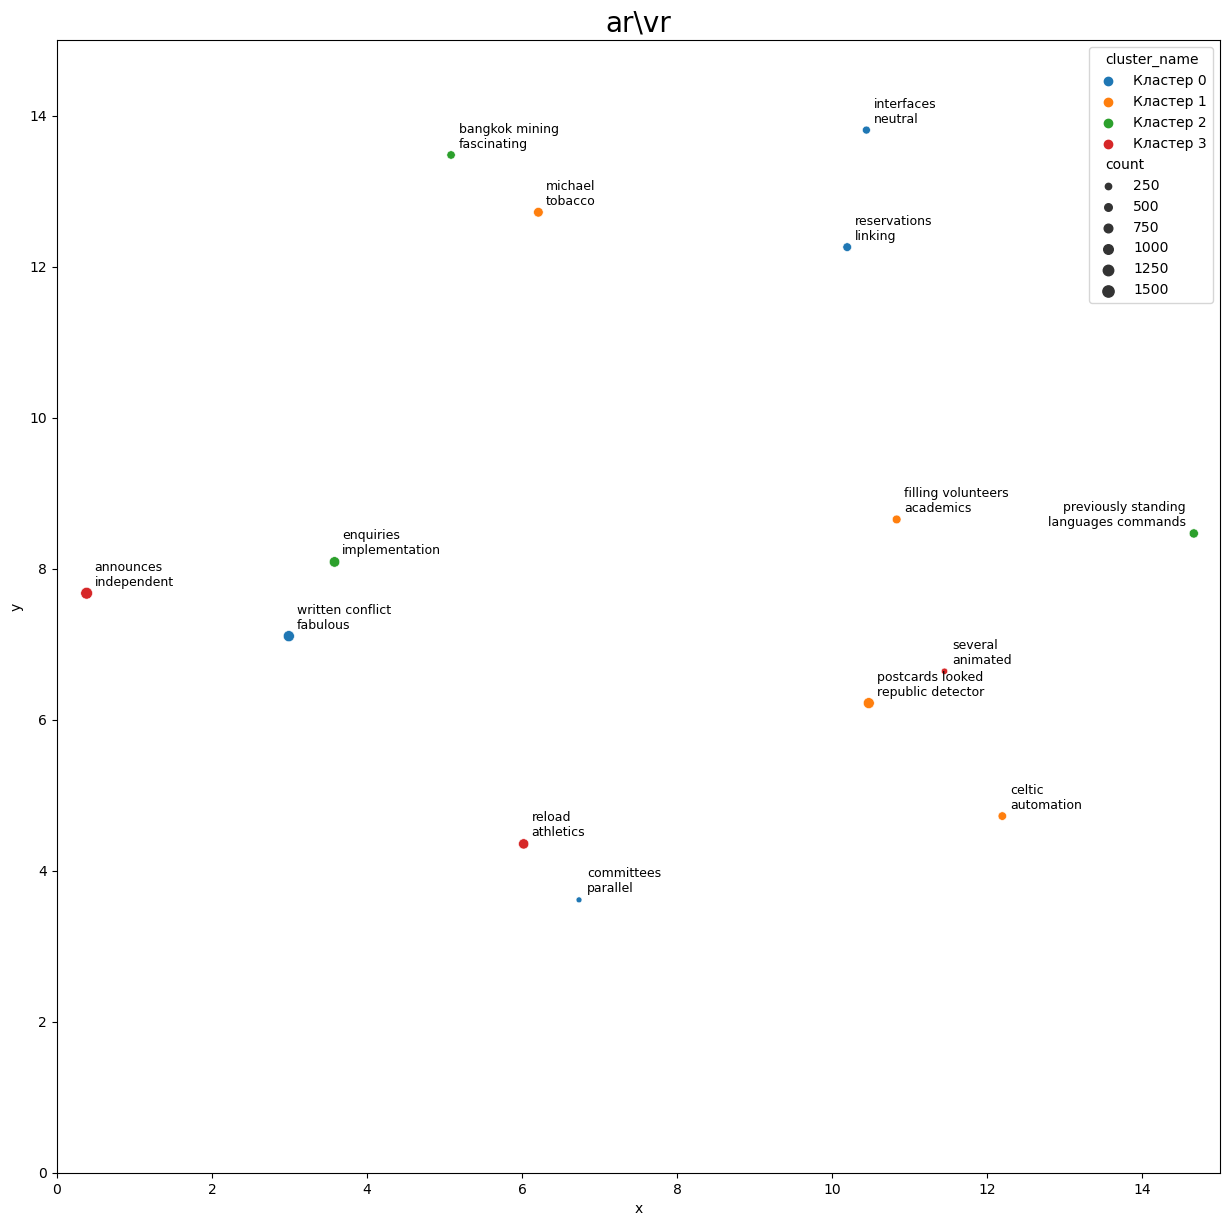

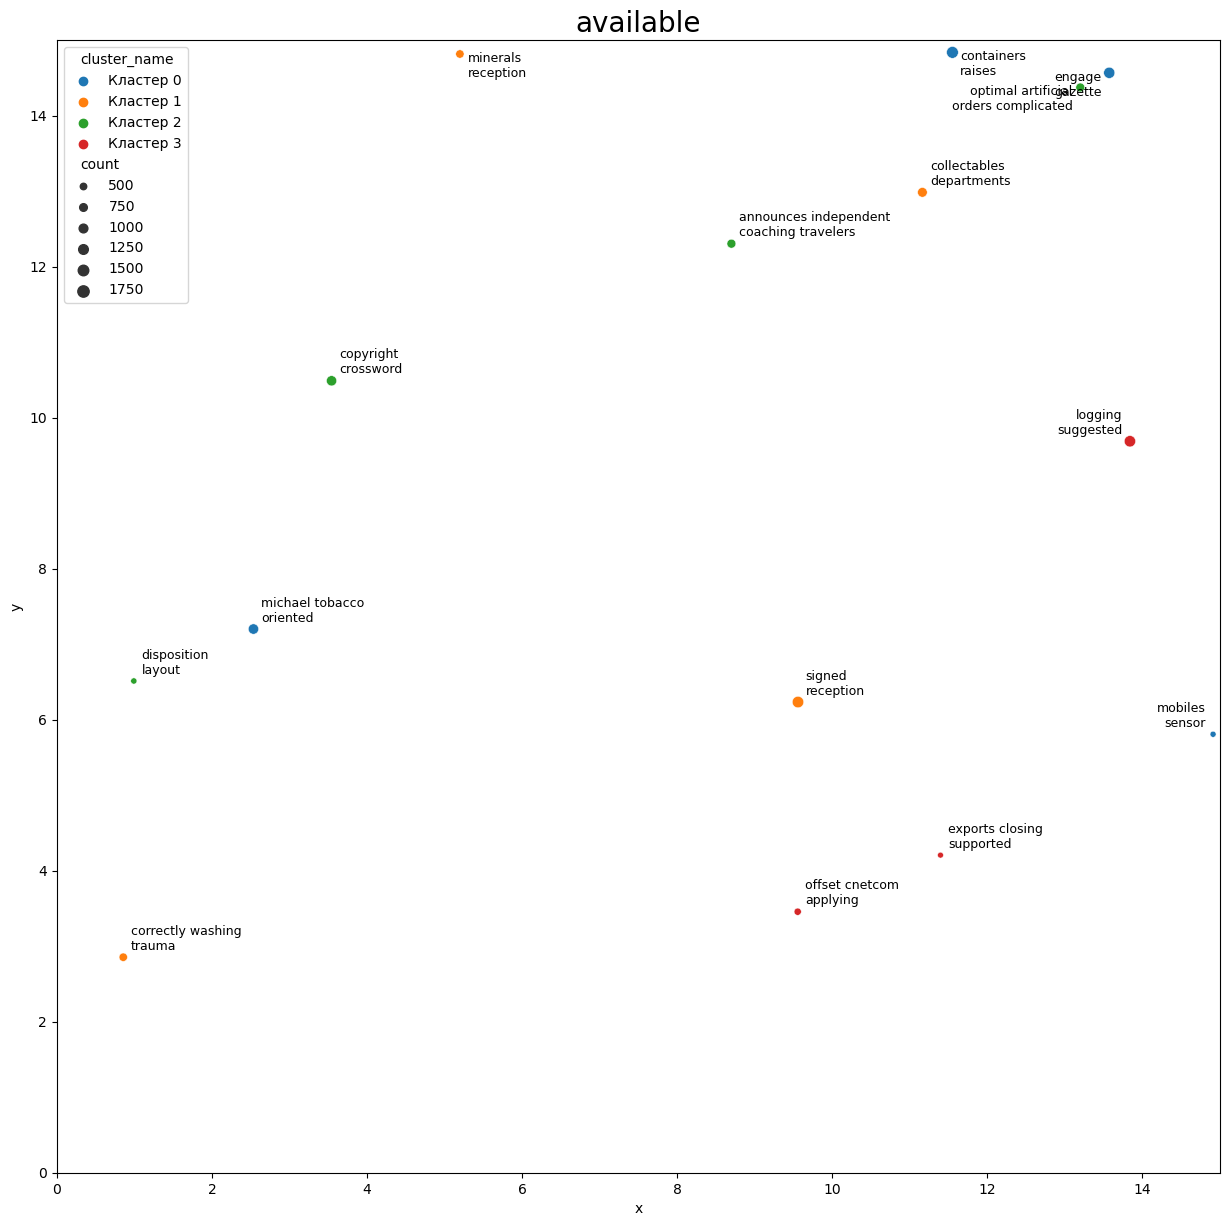

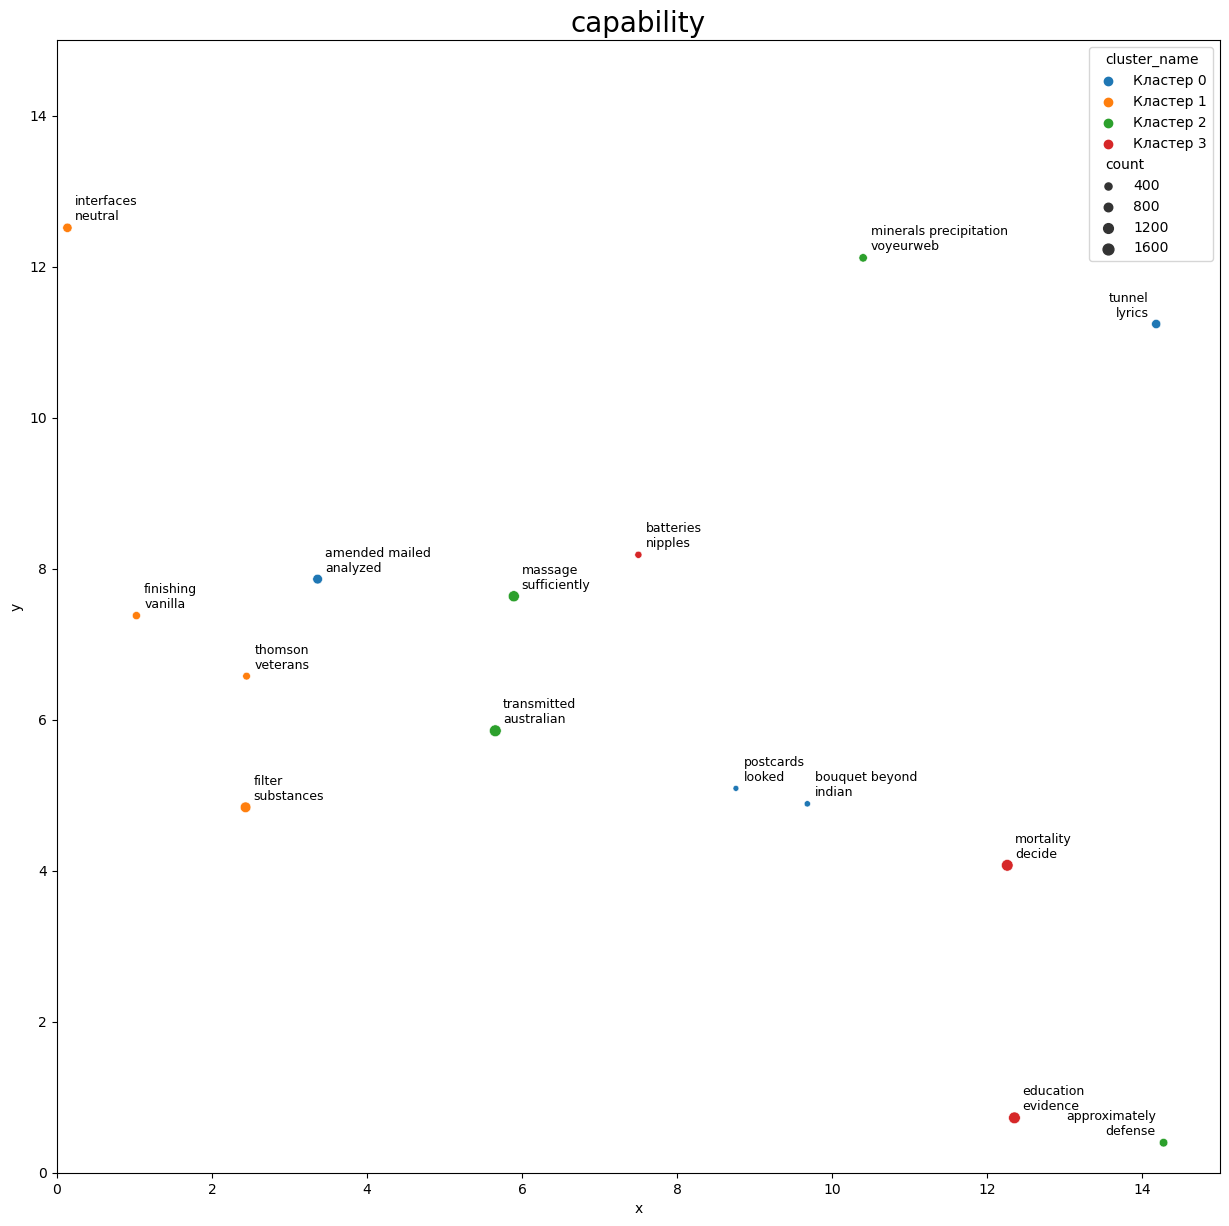

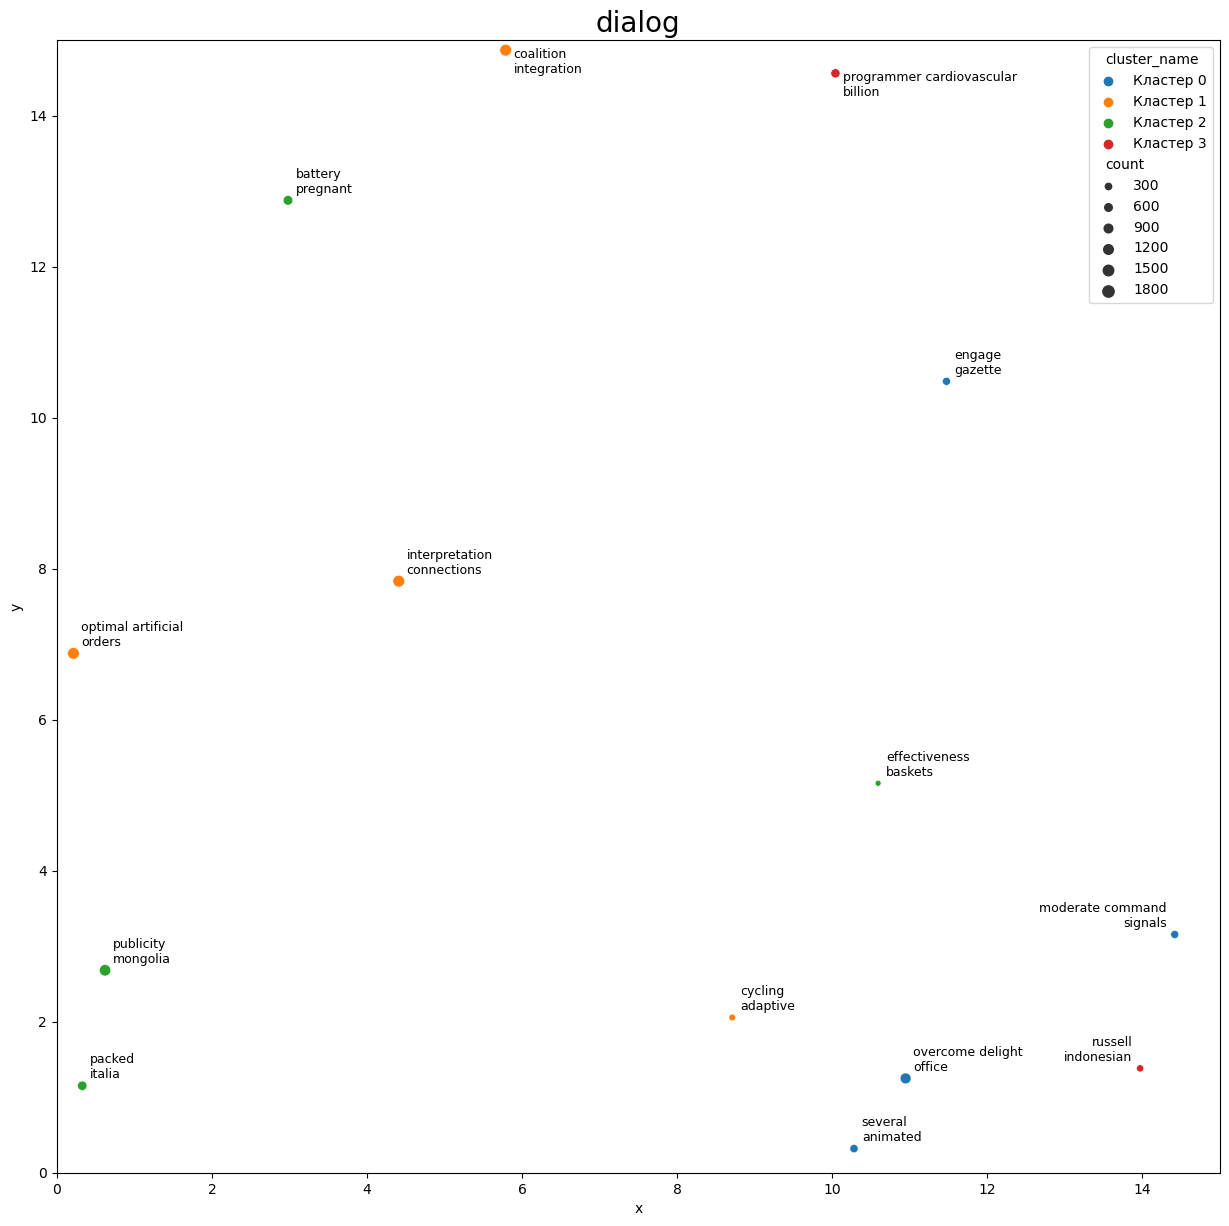

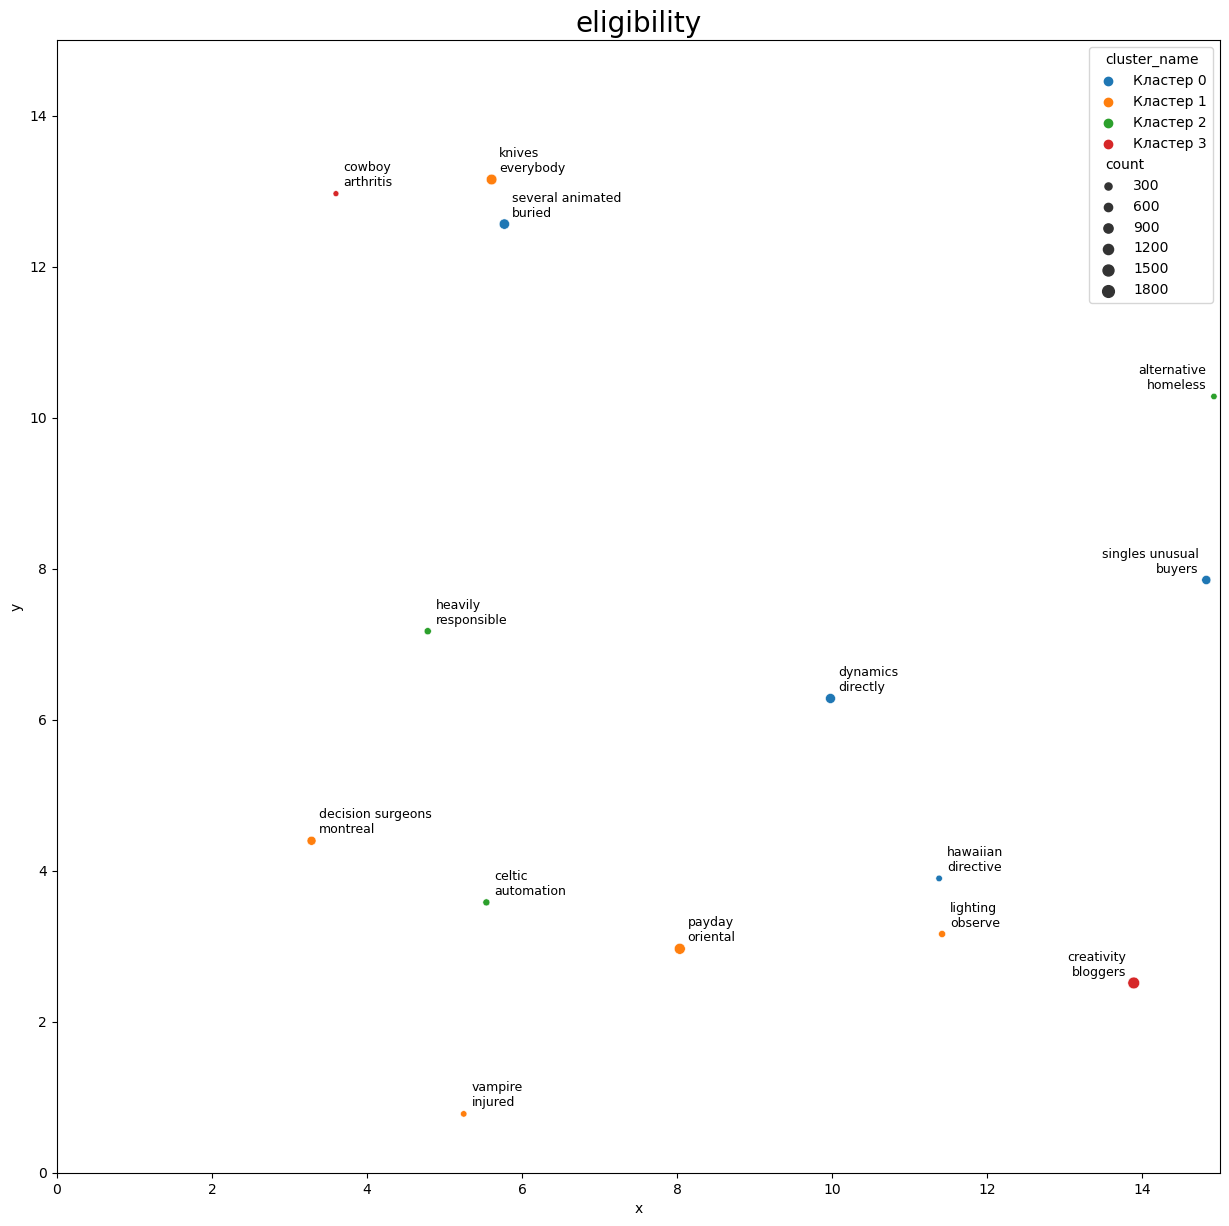

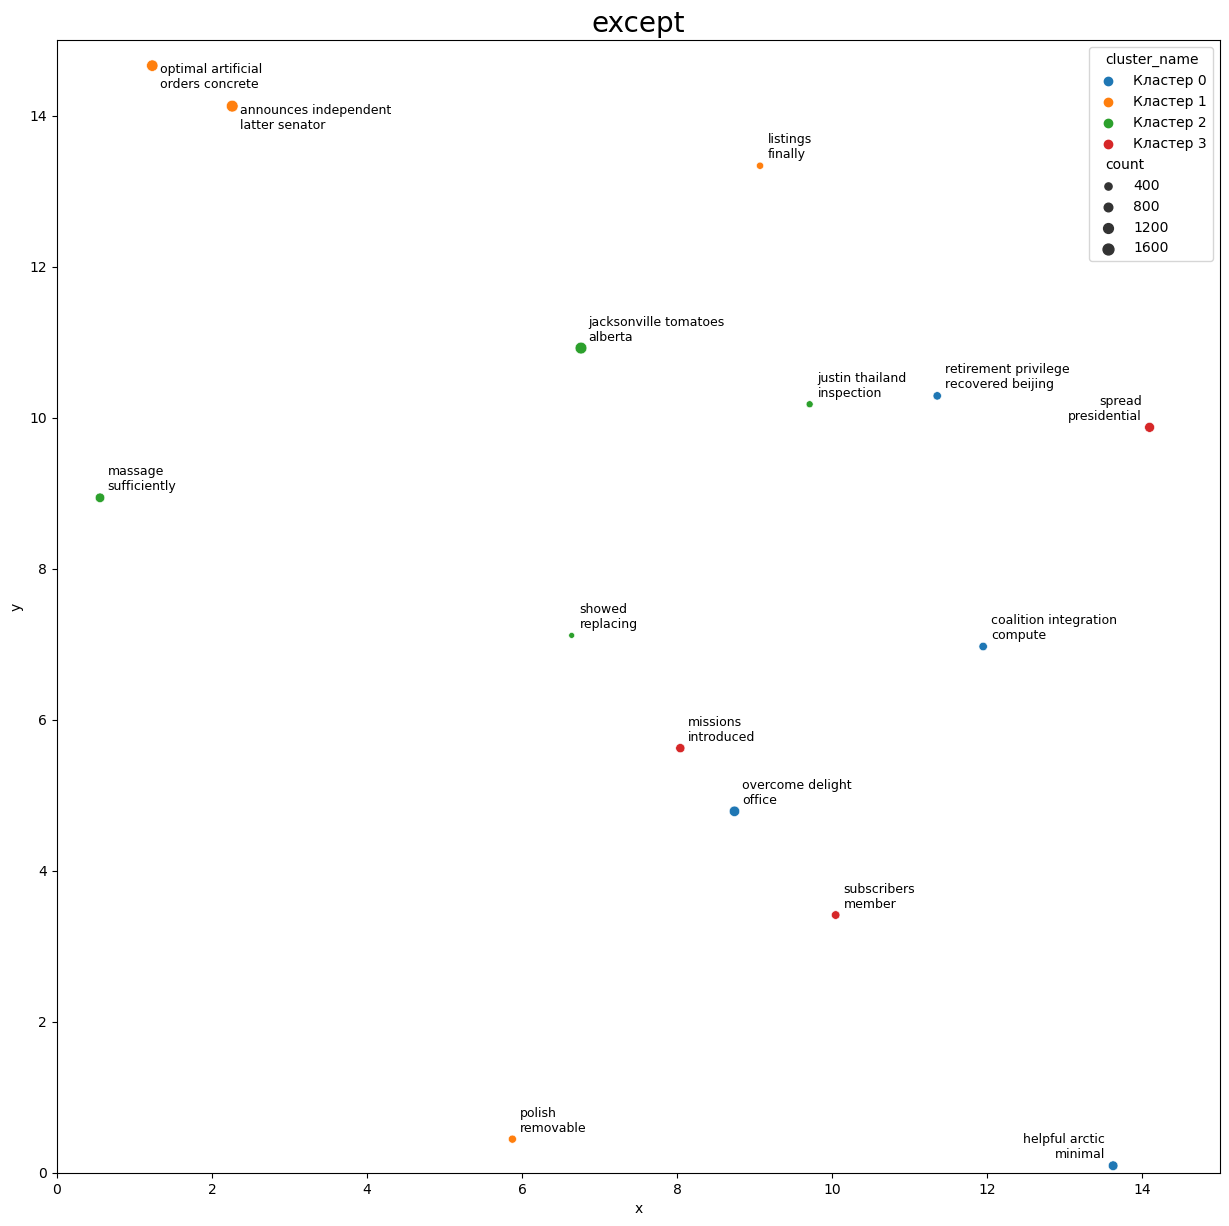

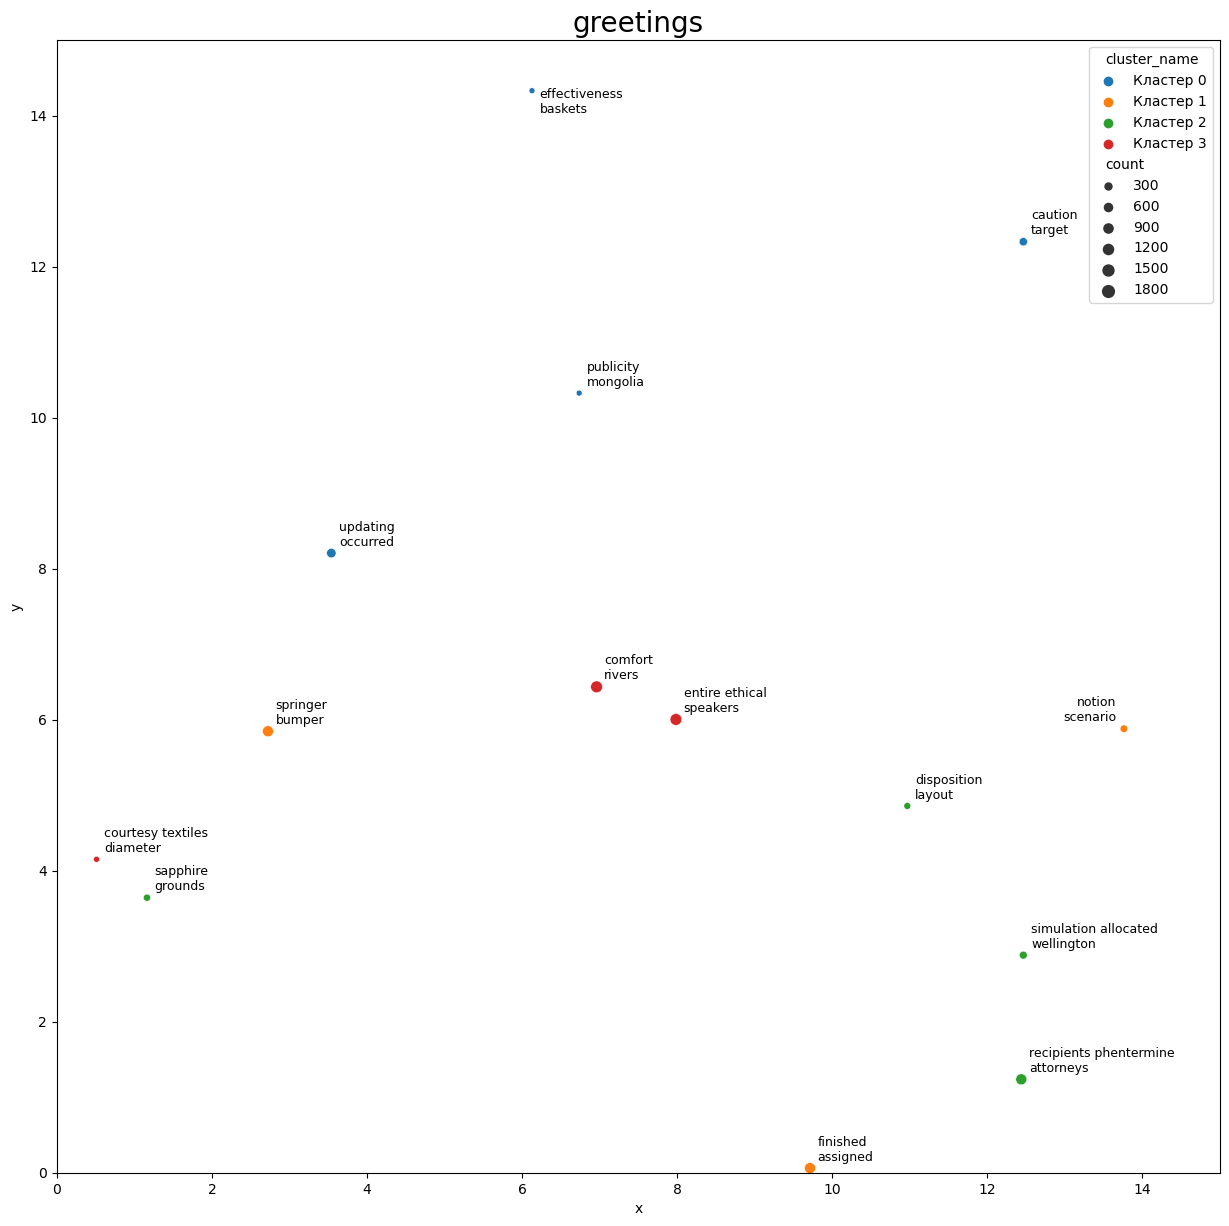

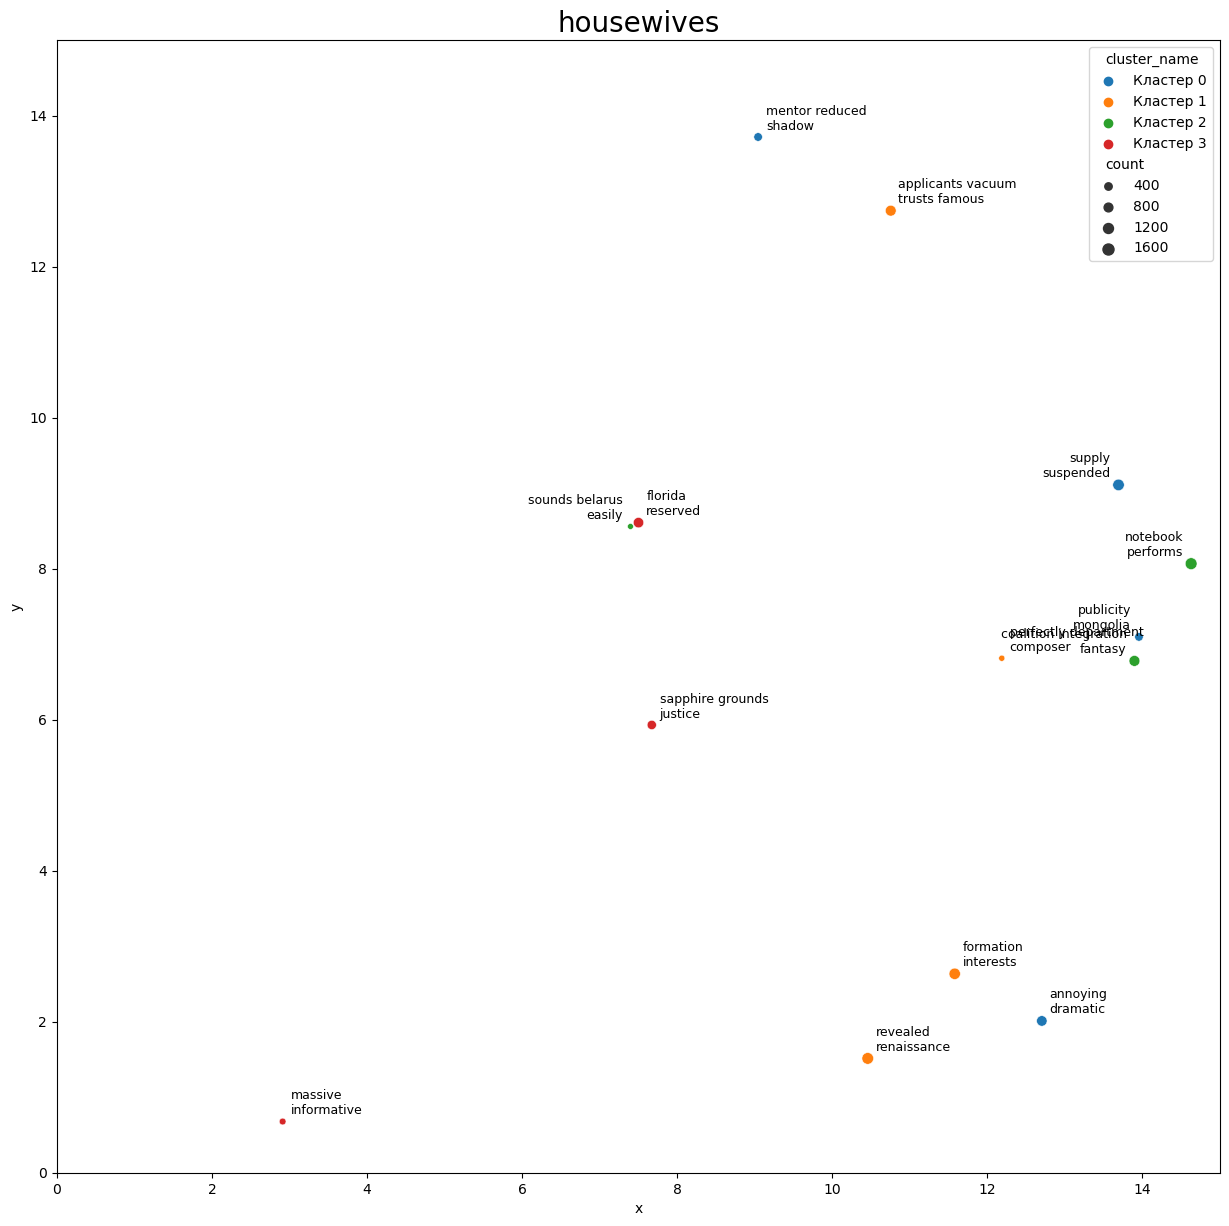

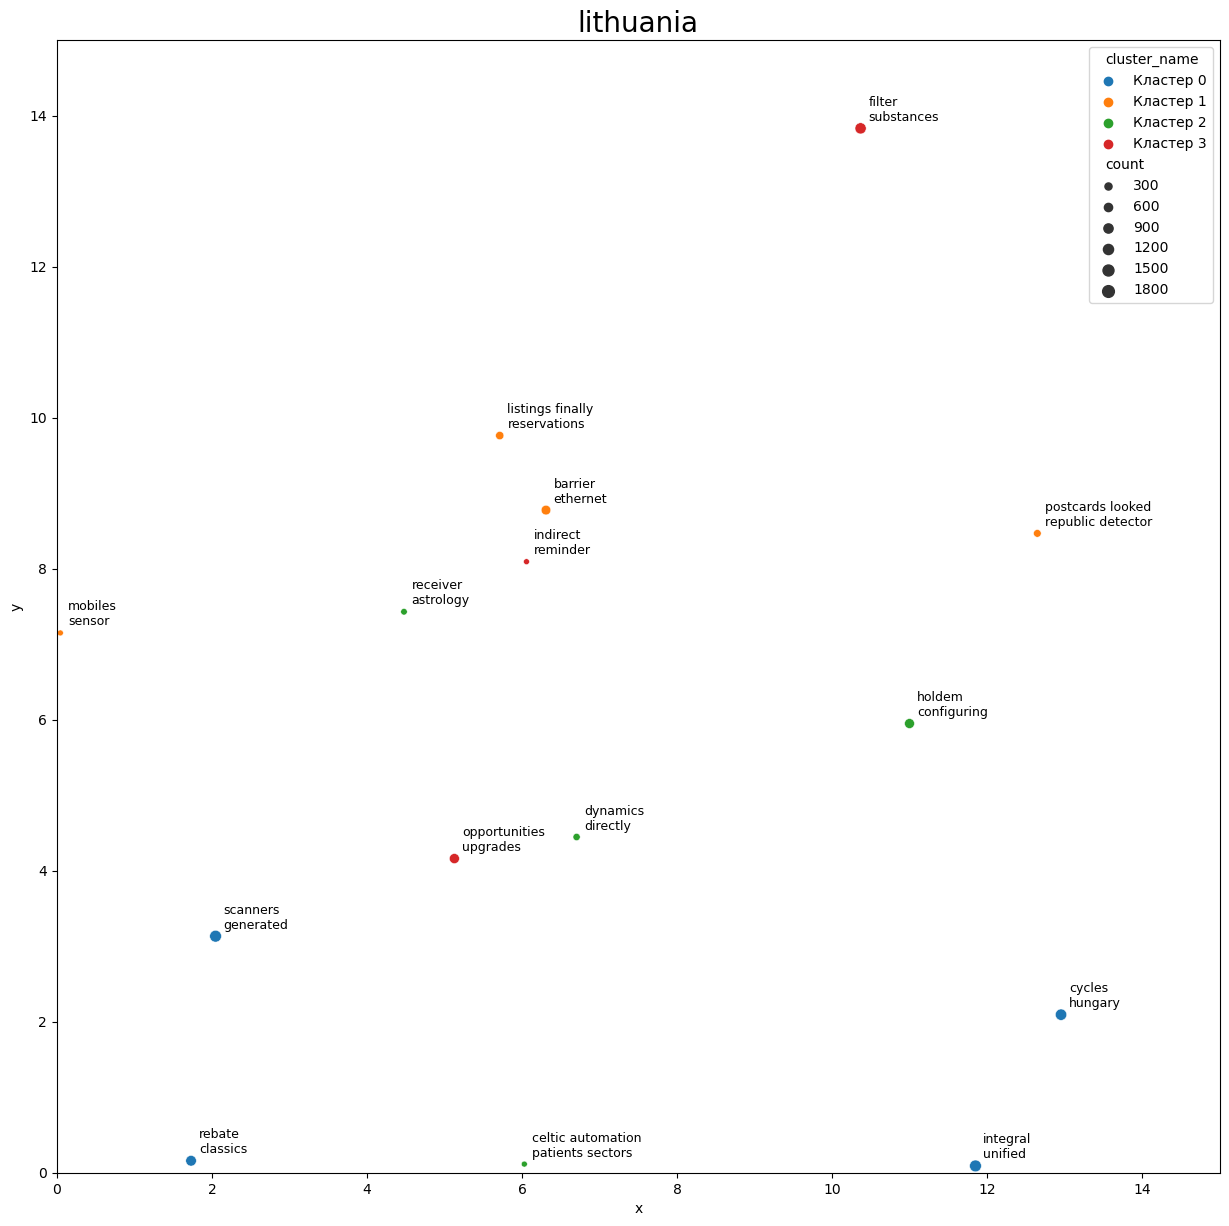

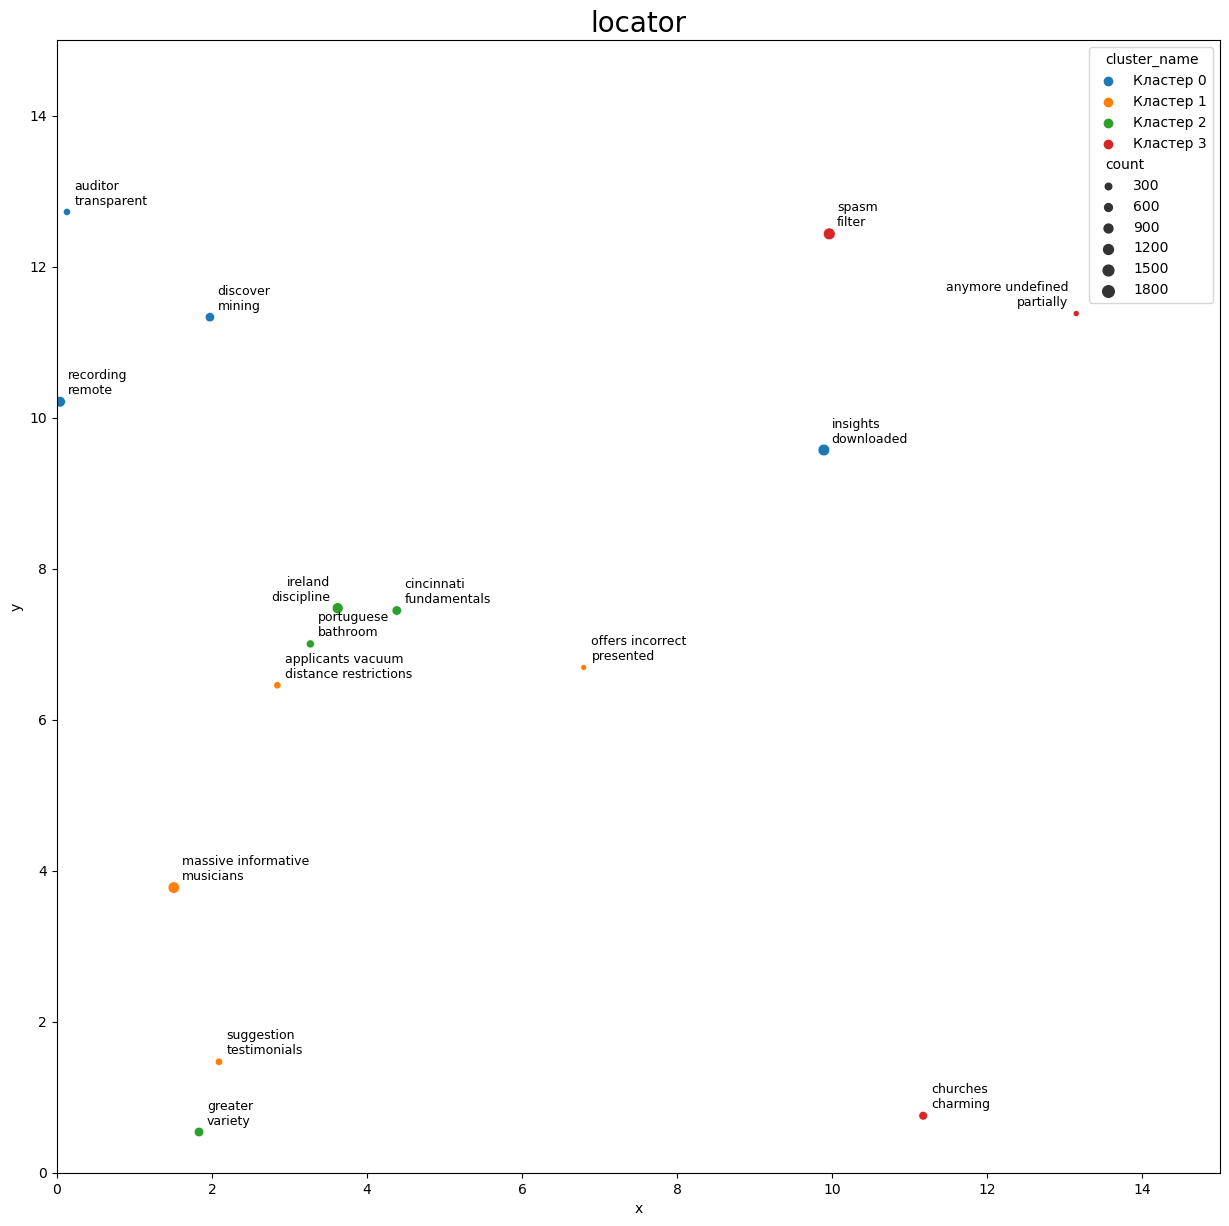

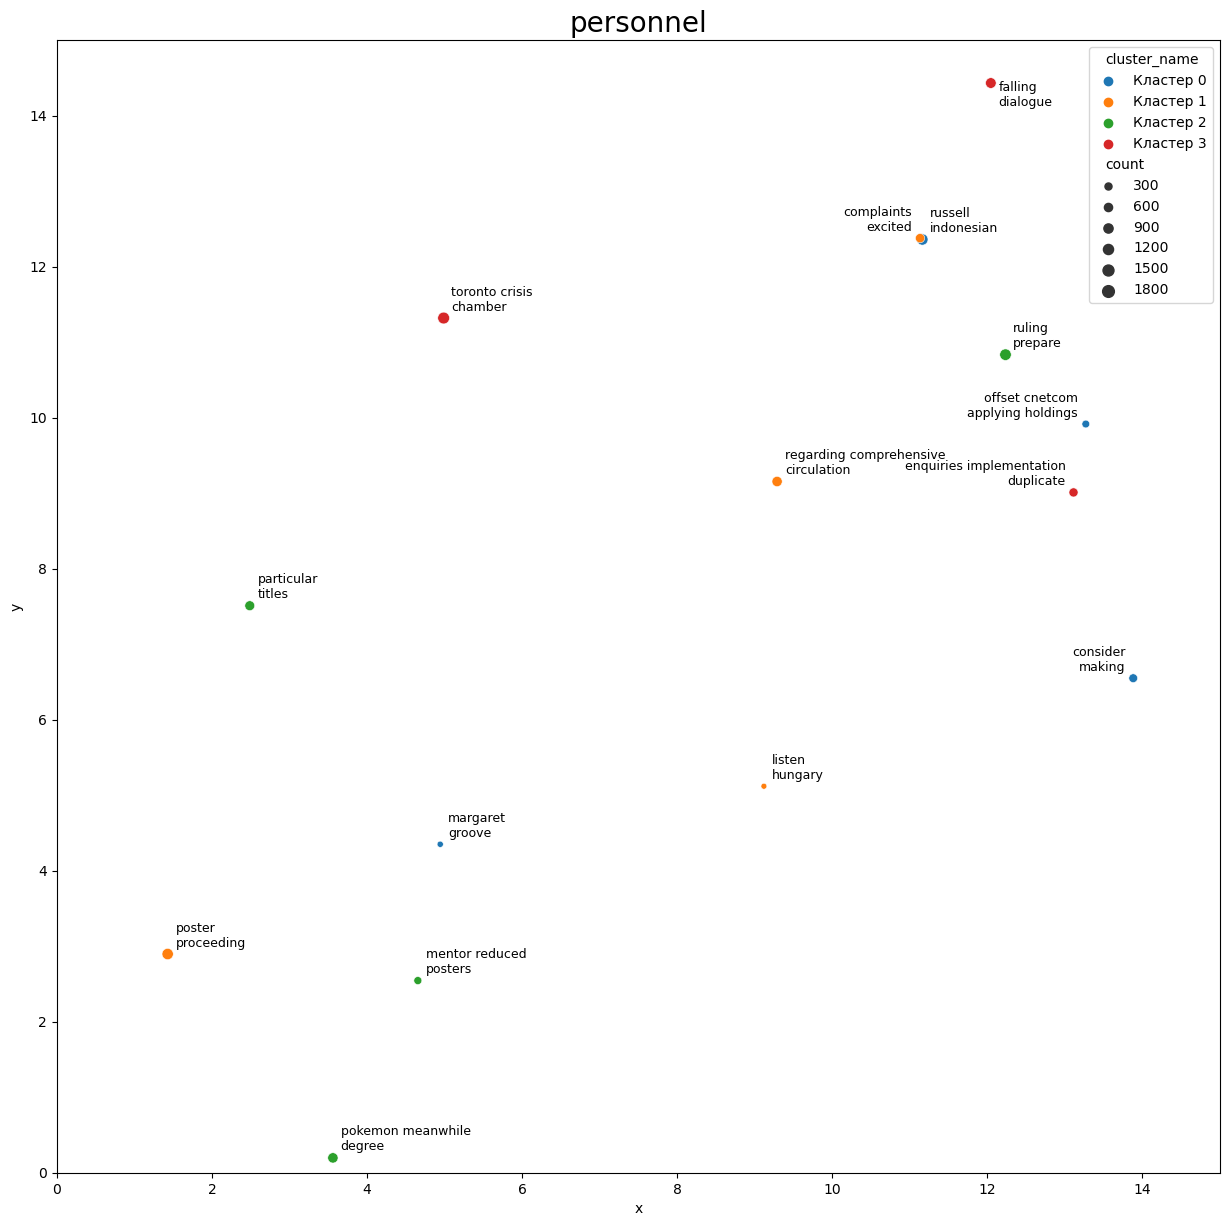

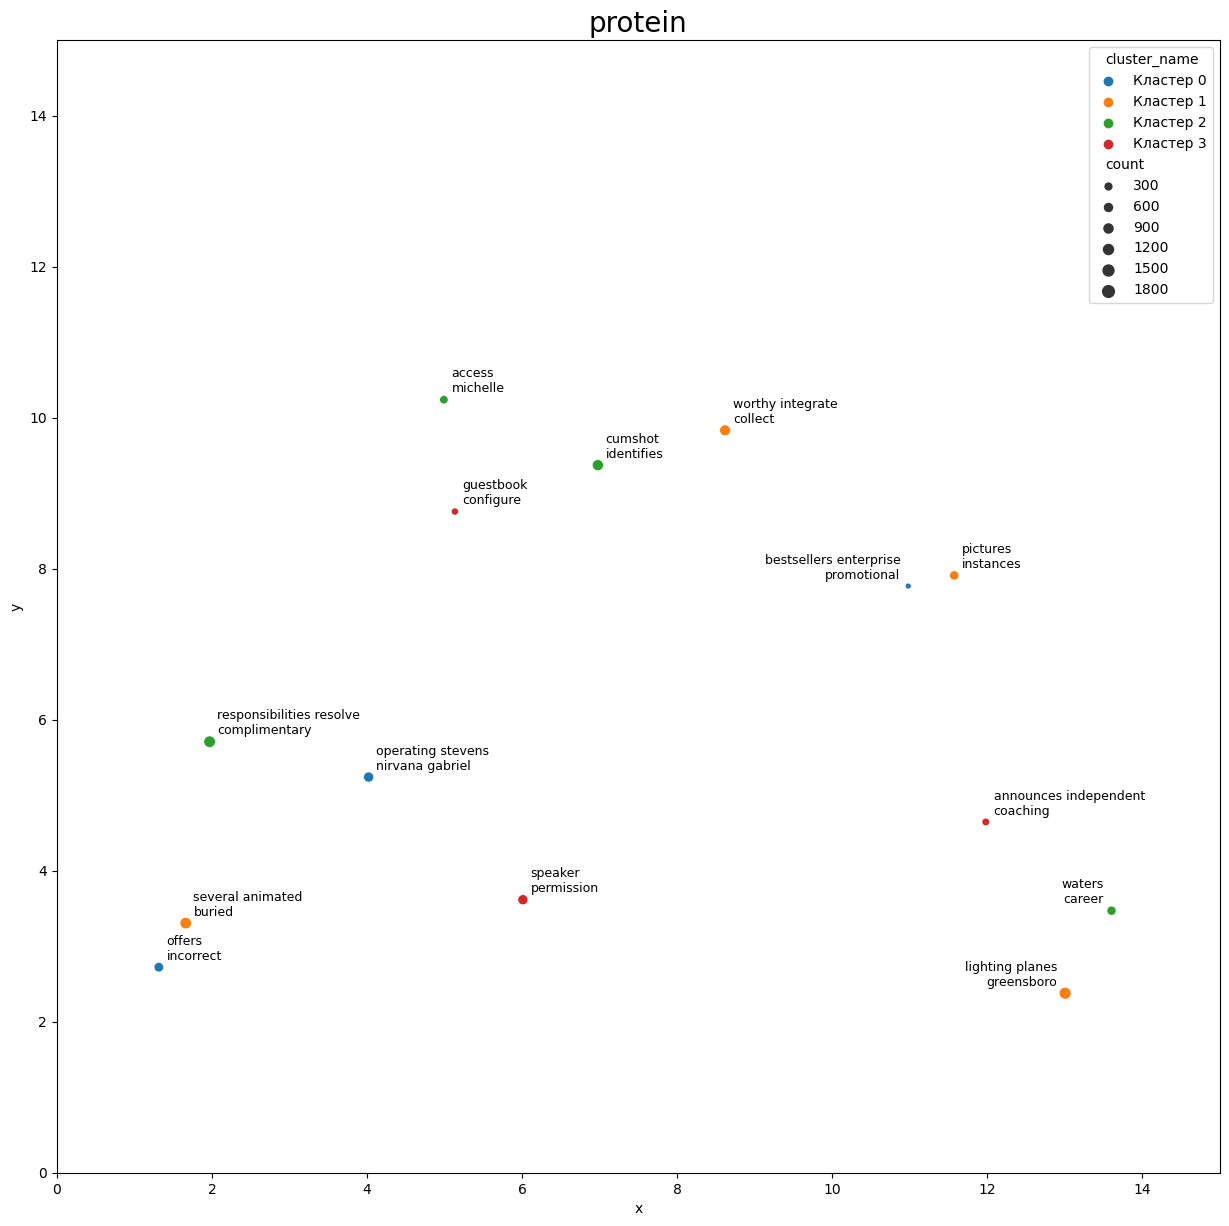

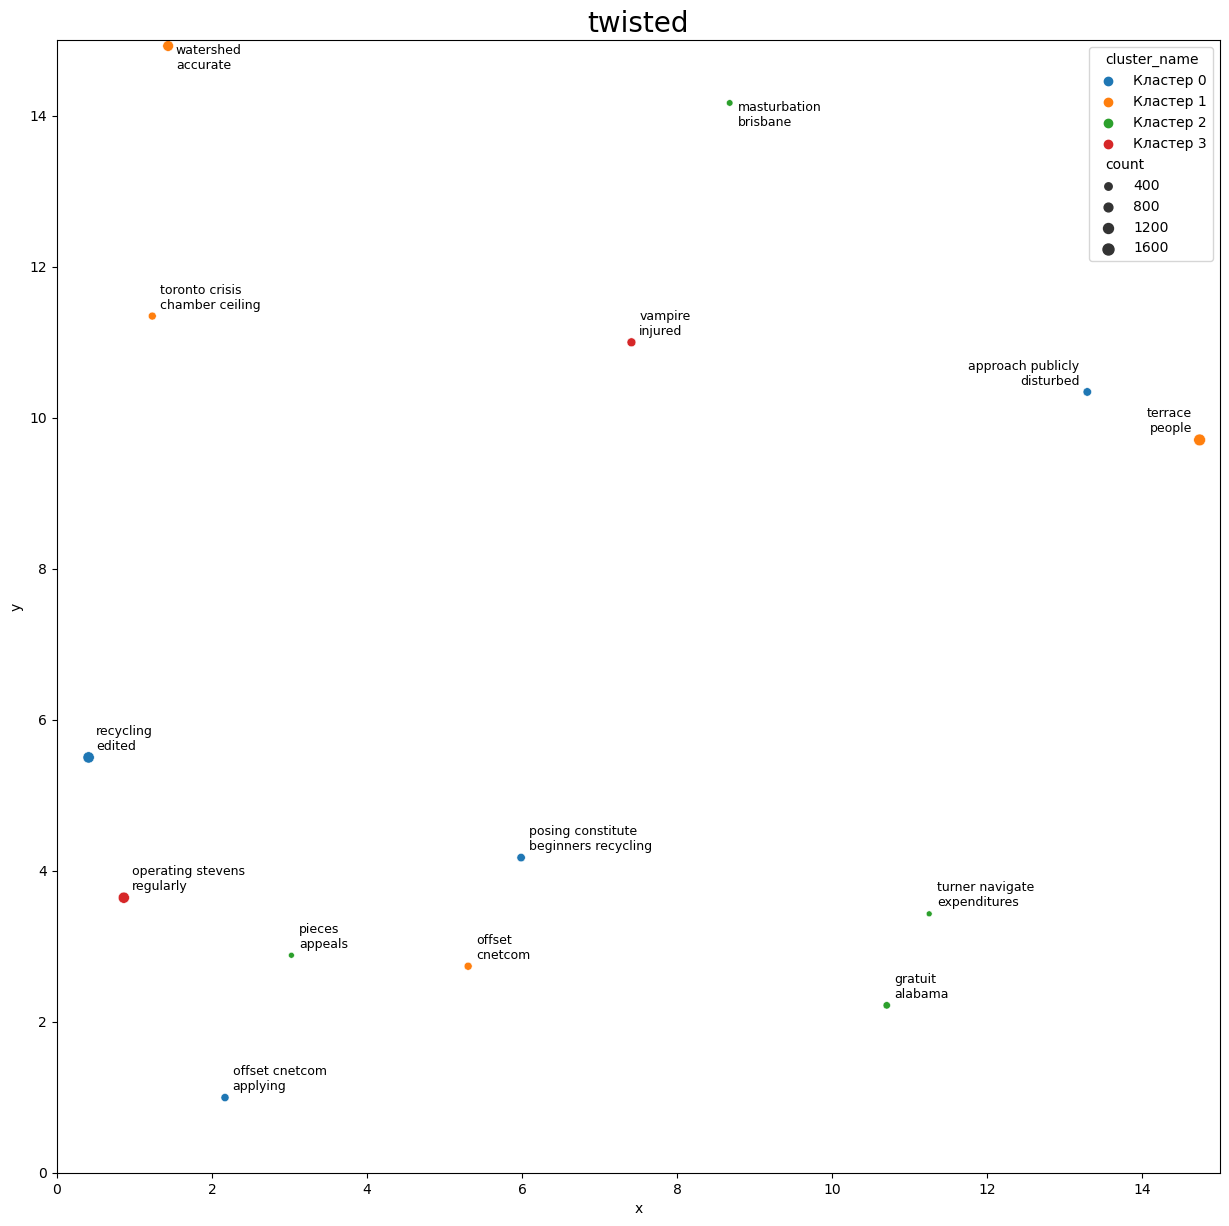

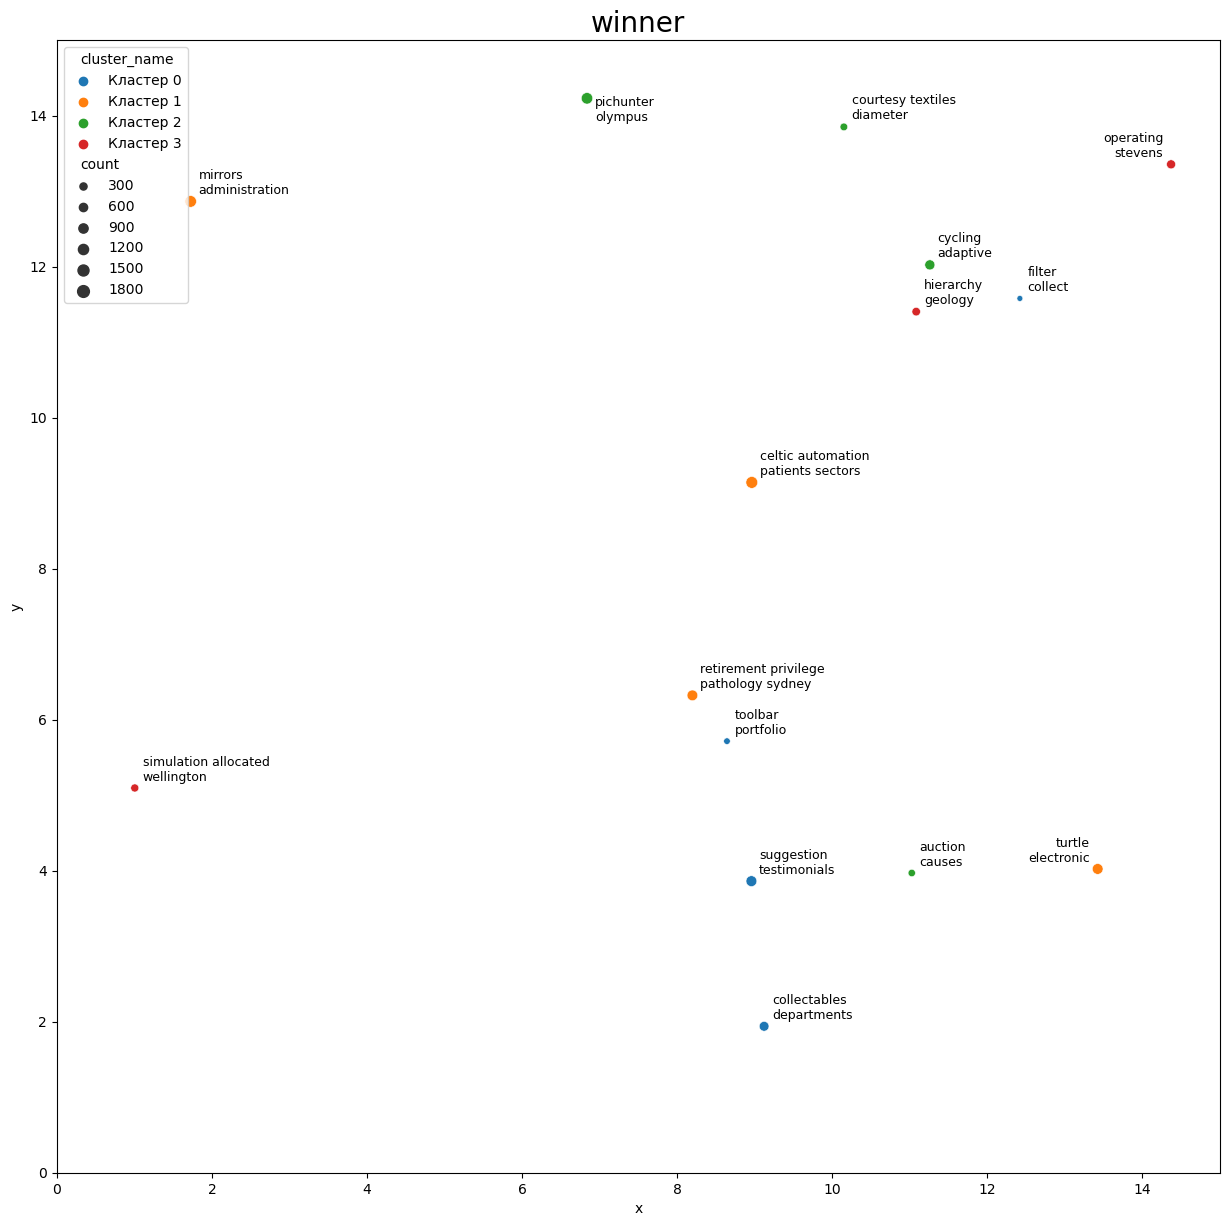

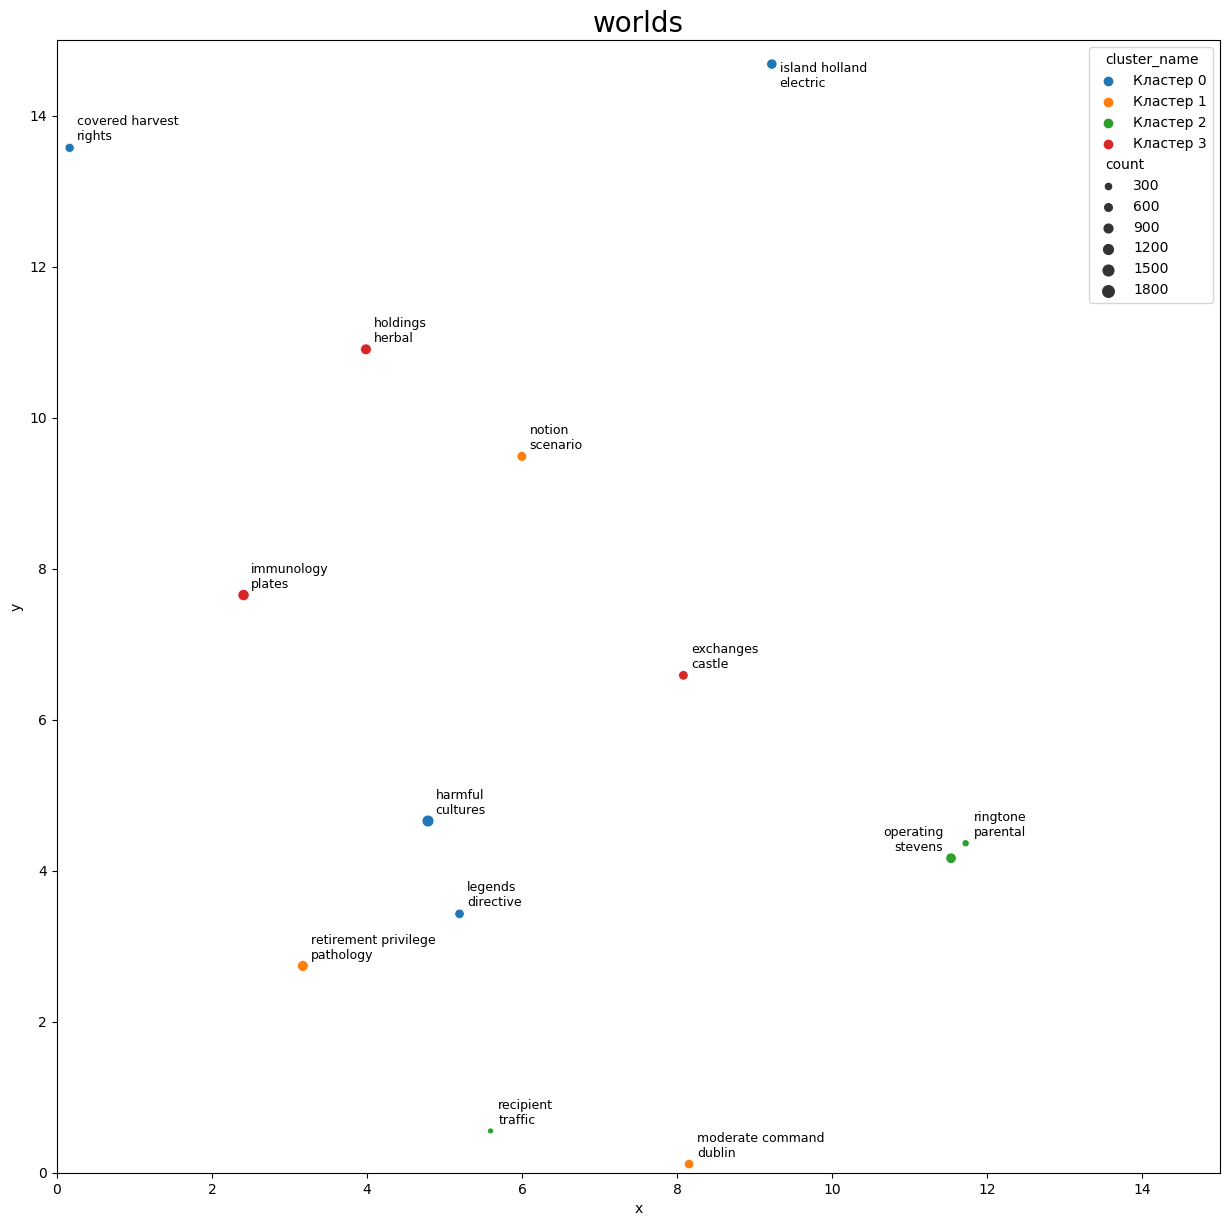

In [227]:
for a in df2['area'].unique():
    # Выделяем область для построения графика
    area = df2[df2['area']==a].copy()
    # Функция для обработки словосочетаний
    def str_n(row):
        lst = row.split(' ')
        if len(lst) == 2:
            return row.replace(' ', '\n')
        elif len(lst) == 3:
            return '{} {}\n{}'.format(lst[0],lst[1],lst[2])
        else:
            return '{} {}\n{} {}'.format(lst[0],lst[1],lst[2],lst[3])
    # Добавляем перенос строк в словосочетаниях
    area['annot'] = area['keyword'].apply(str_n)
    # Добавляем метку для близко расположенных точек
    area['mark'] = area.apply(lambda a: int(any([1 if (-0.9 < (a.x-area.x[i]) < 0) and 
                                                  (-0.2 < (a.y-area.y[i]) < 0.2) 
                                             else 0 for i in area.index])), axis=1)
    
    plt.figure(figsize=(15,15), dpi=100)
    # Строим график
    p1 = sns.scatterplot(x='x', y='y', 
                     data=area, 
                     hue='cluster_name',
                     size='count',
                     legend=True, markers=True) 
    # Добавляем подписи
    for i in area.index:
        p1.text(area.x[i]-0.1 if (area.mark[i]==1)|(area.x[i]>=13) else area.x[i]+0.1, 
                # Опускаем подпись если она ресположена слижком близко к верхнему краю графика
                area.y[i]+0.1 if area.y[i] <= 14 else area.y[i]-0.3,
                area.annot[i], 
                # Разворачиваем подпись если справо есть близко расположенная метка или она стоит близко к краю.
                horizontalalignment='right' if (area.mark[i]==1)|(area.x[i]>=13) else 'left',
                size=9, color='black')
    # Добавляем заголовок и фиксируем оси для каждого графика
    plt.title(a, fontsize=20)
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.show() 